Generation 0: Best Hamming Distance = 216, Avg = 249.555
Generation 50: Best Hamming Distance = 65, Avg = 87.183
Generation 100: Best Hamming Distance = 23, Avg = 35.247
Generation 150: Best Hamming Distance = 3, Avg = 10.498
Generation 200: Best Hamming Distance = 0, Avg = 3.6
Generation 250: Best Hamming Distance = 0, Avg = 2.02
Generation 300: Best Hamming Distance = 0, Avg = 1.515
Generation 350: Best Hamming Distance = 0, Avg = 1.251
Generation 400: Best Hamming Distance = 0, Avg = 1.064
Generation 450: Best Hamming Distance = 0, Avg = 0.871


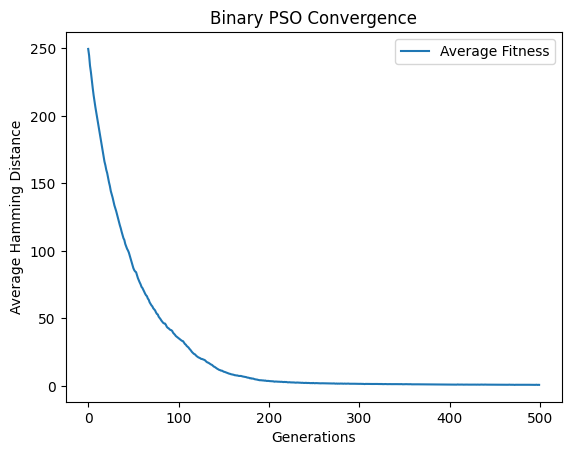


Best found solution: [0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0
 1 

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

# PSO Parameters
POP_SIZE = 1000  # Number of particles
FEATURE_COUNT = 500  # Number of genes (binary selection)
N_GENERATIONS = 500  # Max generations
W = 1  # Inertia weight
C1 = 1.5  # Cognitive weight (particle’s own best)
C2 = 1.5  # Social weight (global best)

# Sigmoid function for converting velocity to probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hamming distance fitness function
def evaluate_fitness(individual, target):
    return sum(x != y for x, y in zip(individual, target))  # Minimize distance

# Initialize particles (binary)
def initialize_population():
    return np.random.randint(2, size=(POP_SIZE, FEATURE_COUNT))  # Random 0/1

# Initialize velocities
def initialize_velocities():
    return np.random.uniform(-1, 1, (POP_SIZE, FEATURE_COUNT))  # Small random values

# Binary update rule
def update_positions(population, velocities):
    prob = sigmoid(velocities)  # Convert velocity to probability
    new_population = (np.random.rand(POP_SIZE, FEATURE_COUNT) < prob).astype(int)  # Flip bits with probability
    return new_population

# PSO Main Loop
def binary_pso(target_individual):
    population = initialize_population()  # Random binary solutions
    velocities = initialize_velocities()  # Random velocities

    # Personal bests (initially the particles themselves)
    p_best = np.copy(population)
    p_best_scores = np.array([evaluate_fitness(ind, target_individual) for ind in population])

    # Global best (best solution found by any particle)
    g_best = p_best[np.argmin(p_best_scores)]
    g_best_score = min(p_best_scores)

    fitness_history = []  # Track progress

    for gen in range(N_GENERATIONS):
        # Evaluate fitness
        fitness_scores = np.array([evaluate_fitness(ind, target_individual) for ind in population])

        # Update personal bests
        improved = fitness_scores < p_best_scores
        p_best[improved] = population[improved]
        p_best_scores[improved] = fitness_scores[improved]

        # Update global best
        if min(p_best_scores) < g_best_score:
            g_best = p_best[np.argmin(p_best_scores)]
            g_best_score = min(p_best_scores)

        # Update velocities
        r1, r2 = np.random.rand(POP_SIZE, FEATURE_COUNT), np.random.rand(POP_SIZE, FEATURE_COUNT)
        velocities = (W * velocities +
                      C1 * r1 * (p_best - population) +
                      C2 * r2 * (g_best - population))

        # Update positions using the binary update rule
        population = update_positions(population, velocities)

        # Track progress
        avg_fitness = np.mean(fitness_scores)
        fitness_history.append(avg_fitness)

        # Print every 10 generations
        if gen % 50 == 0:
            print(f"Generation {gen}: Best Hamming Distance = {g_best_score}, Avg = {avg_fitness}")

    # Plot fitness over generations
    plt.plot(fitness_history, label="Average Fitness")
    plt.xlabel("Generations")
    plt.ylabel("Average Hamming Distance")
    plt.title("Binary PSO Convergence")
    plt.legend()
    plt.show()

    return g_best, g_best_score

# Run the BPSO
target_individual = np.random.randint(2, size=FEATURE_COUNT)  # Random target to mimic genes
best_solution, best_fitness = binary_pso(target_individual)

print("\nBest found solution:", best_solution)
print("Best fitness (Hamming distance):", best_fitness)
